Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [7]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [4]:
df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]}, index=['dog', 'hawk'])
df

,num_legs,num_wings
dog,4,0
hawk,2,2


In [11]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [13]:
for row in df.itertuples(name='animal'):
    print(row)
for row in df.itertuples(name='animal'):
    print(row.Index)
for row in df.itertuples(name='animal', index=False):
    print(row.num_legs)
for row in df.itertuples(name='animal'):
    print(row.num_legs)

animal(Index='dog', num_legs=4, num_wings=0)
animal(Index='hawk', num_legs=2, num_wings=2)
dog
hawk
4
2
4
2


In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'), parse_dates=True)
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
print('Shapes of the loaded dataframes ...')
print('transactions', transactions.shape)
print('items', items.shape)
print('item_categories', item_categories.shape)
print('shops', shops.shape)

Shapes of the loaded dataframes ...
transactions (2935849, 6)
items (22170, 3)
item_categories (84, 2)
shops (60, 2)


In [5]:
transactions.head()
#items.head()
#item_categories.head()
#shops.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [7]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')
transactions.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [8]:
transactions.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
transactions['day'] = transactions['date'].dt.day
transactions['month'] = transactions['date'].dt.month
transactions['year'] = transactions['date'].dt.year
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013


In [10]:
transactions.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
dtype: object

In [11]:
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
# slice only dataframe for relevant period
transactions_2014 = transactions[transactions['year'] == 2014]
# slice off the relevant month's transactions - do not exclude returns
trans_2014_sep = transactions_2014[(transactions_2014['month'] == 9)]
# use groupby to retrieve data per shop
max_rev_per_shop = trans_2014_sep.groupby(['shop_id'])['revenue'].sum().max()
print('Max revenue per shop', max_rev_per_shop)

Max revenue per shop 7982852.199999956


In [12]:
max_revenue = max_rev_per_shop
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [13]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [15]:
combined_trans_2014 = transactions_2014.merge(items, left_on='item_id', right_on='item_id')
combined_trans_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue,item_name,item_category_id
0,2014-01-02,12,54,10297,749.0,1.0,2,1,2014,749.0,ГАДКИЙ Я 1-2 (BD),37
1,2014-01-10,12,54,10297,749.0,1.0,10,1,2014,749.0,ГАДКИЙ Я 1-2 (BD),37
2,2014-01-24,12,54,10297,749.0,1.0,24,1,2014,749.0,ГАДКИЙ Я 1-2 (BD),37
3,2014-01-31,12,54,10297,749.0,1.0,31,1,2014,749.0,ГАДКИЙ Я 1-2 (BD),37
4,2014-01-23,12,58,10297,749.0,1.0,23,1,2014,749.0,ГАДКИЙ Я 1-2 (BD),37


In [16]:
# slice off the summer transactions only
trans_2014_summer = combined_trans_2014[(combined_trans_2014['month'] >= 6) & (combined_trans_2014['month'] <= 8)]
cat_revenue = trans_2014_summer.groupby(['item_category_id'])['revenue'].sum()
cat_with_max_rev = cat_revenue.argmax()
cat_max_rev = cat_revenue.to_frame().revenue.iloc[cat_with_max_rev]
print('Category with max revenue is (item_id =', cat_with_max_rev, ') with revenue', cat_max_rev)

Category with max revenue is (item_id = 15 ) with revenue 32157302.430000115


In [17]:
category_id_with_max_revenue = cat_with_max_rev
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 15


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [39]:
nitems_unique_prices = transactions.groupby(['item_id'])['item_price'].nunique().to_frame()
nitems_unique_prices.rename(columns={'item_price': 'nunique_price'}, inplace=True)
items_unchanged = nitems_unique_prices[nitems_unique_prices['nunique_price'] == 1]
items_unchanged.shape

(5926, 1)

In [40]:
num_items_constant_price = items_unchanged.shape[0]
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [94]:
combined_trans_2014_dec = combined_trans_2014[(combined_trans_2014['month'] == 12)]
trans_shop25 = combined_trans_2014_dec[combined_trans_2014_dec['shop_id'] == 25]
the_groups = trans_shop25.groupby(['day'])
total_nitems = the_groups['item_cnt_day'].sum()
the_days = [name for name, the_day in the_groups]
nitem_per_var = total_nitems.var(ddof=1)
print('Variance in nitems', nitem_per_var)

Variance in nitems 117167.70229885059


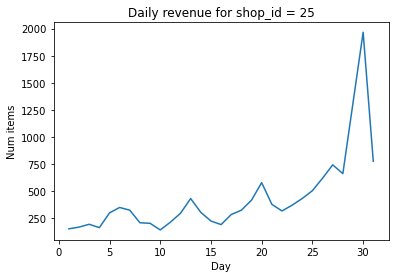

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [95]:
shop_id = 25

total_num_items_sold = total_nitems
days = the_days

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = nitem_per_var
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [41]:
STUDENT_EMAIL = 'ferdinand.che@gmail.com'
STUDENT_TOKEN = 'vaOOgEf5rM4bqlS1'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 15
Task num_items_constant_price: 5926
Task total_num_items_sold_var: ----------


In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)